# Book Recommendation System
[<img src="https://copyassignment.com/wp-content/uploads/2022/07/buy-1024x576.png" width="350"/>](image.png)

# Abstract 
This work will introduce a Collaborative Book Recommendation System using two popular techniques: K-Nearest Neighbors (KNN) and Matrix Factorization (MF) methods such as correlation and Singular Value Decomposition (SVD). The proposed system aims to provide personalized book recommendations based on user preferences and historical data. The KNN algorithm identifies similar users and recommends books based on their reading habits. Additionally, the Matrix Factorization approach, including correlation and SVD, is used to extract latent features from the user-item matrix, enabling accurate predictions of user preferences. The combination of these techniques results in an effective collaborative book recommendation system that enhances user satisfaction and engagement.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

# Introduction of the Data
This goodbooks-10k dataset(https://github.com/zygmuntz/goodbooks-10k) contains almost 6 million ratings of 10 thousand popular books.As of the record every book have more eor less 100 reviews. The book IDs range from 1 to 10,000, while the user IDs range from 1 to 53,424. All users in the system have provided a minimum of two ratings, ensuring a comprehensive dataset. The median number of ratings per user is eight, indicating a sufficient amount of user feedback for accurate recommendation generation. 

In [2]:
# Load the books data
books_df = pd.read_csv('books.csv')

# Load the ratings data
ratings_df = pd.read_csv('ratings.csv')

In [3]:
books_df.head(2)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [4]:
ratings_df.head(2)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4


In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [8]:
books_df.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


#### Data Visualization

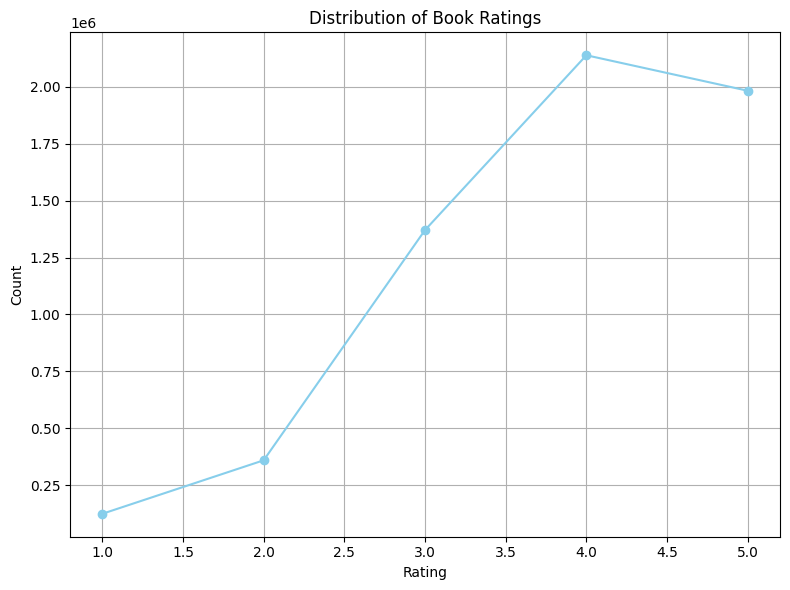

In [9]:
import matplotlib.pyplot as plt

# Count the number of books for each rating
rating_counts = ratings_df['rating'].value_counts().sort_index()

# Create line graph
plt.figure(figsize=(8, 6))
plt.plot(rating_counts.index, rating_counts, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()

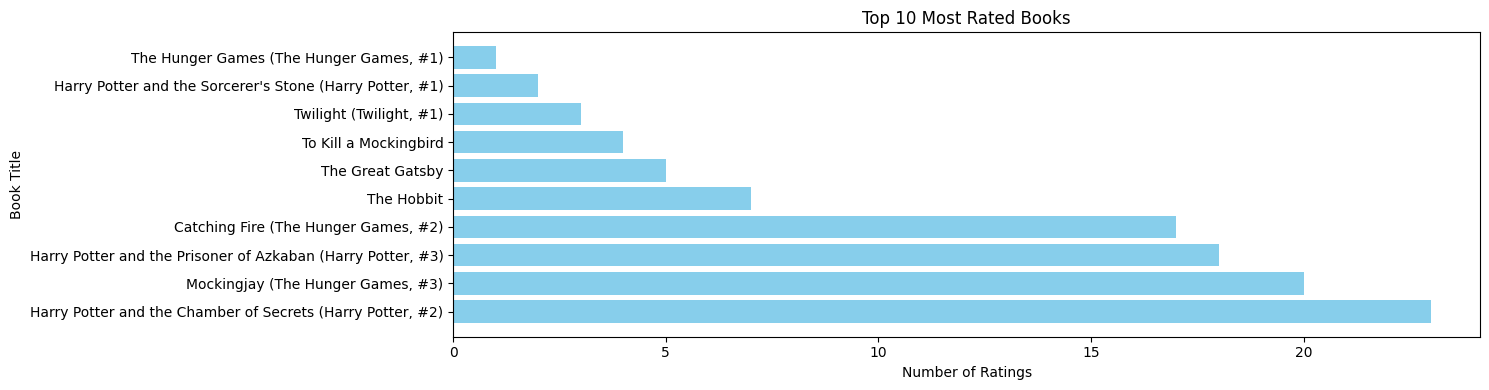

In [10]:
top_rated_books = ratings_df['book_id'].value_counts().head(10)
top_rated_books = books_df.merge(top_rated_books, left_on='book_id', right_index=True)
plt.figure(figsize=(15, 4))
plt.barh(top_rated_books['title'], top_rated_books['book_id'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 10 Most Rated Books')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

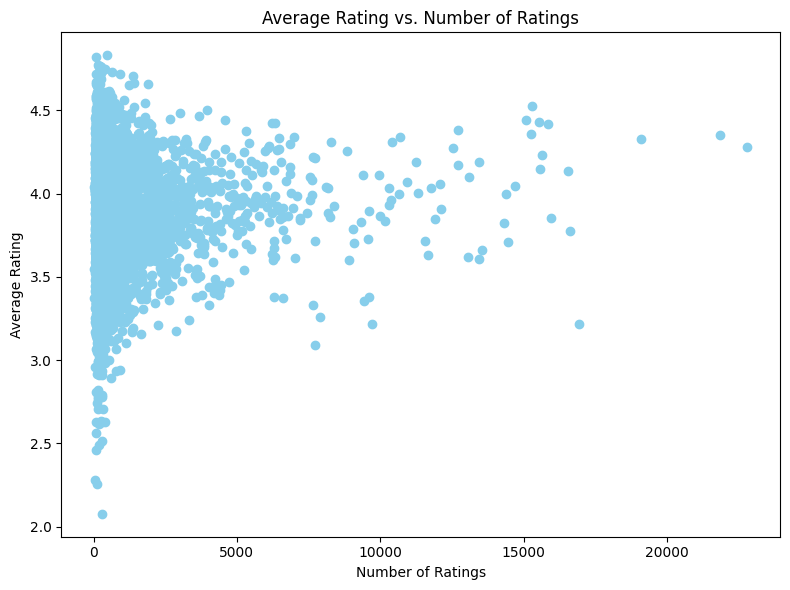

In [11]:
book_ratings = ratings_df.groupby('book_id')['rating'].agg(['mean', 'count']).reset_index()
merged_df = books_df.merge(book_ratings, on='book_id')
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['count'], merged_df['mean'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Number of Ratings')
plt.tight_layout()
plt.show()

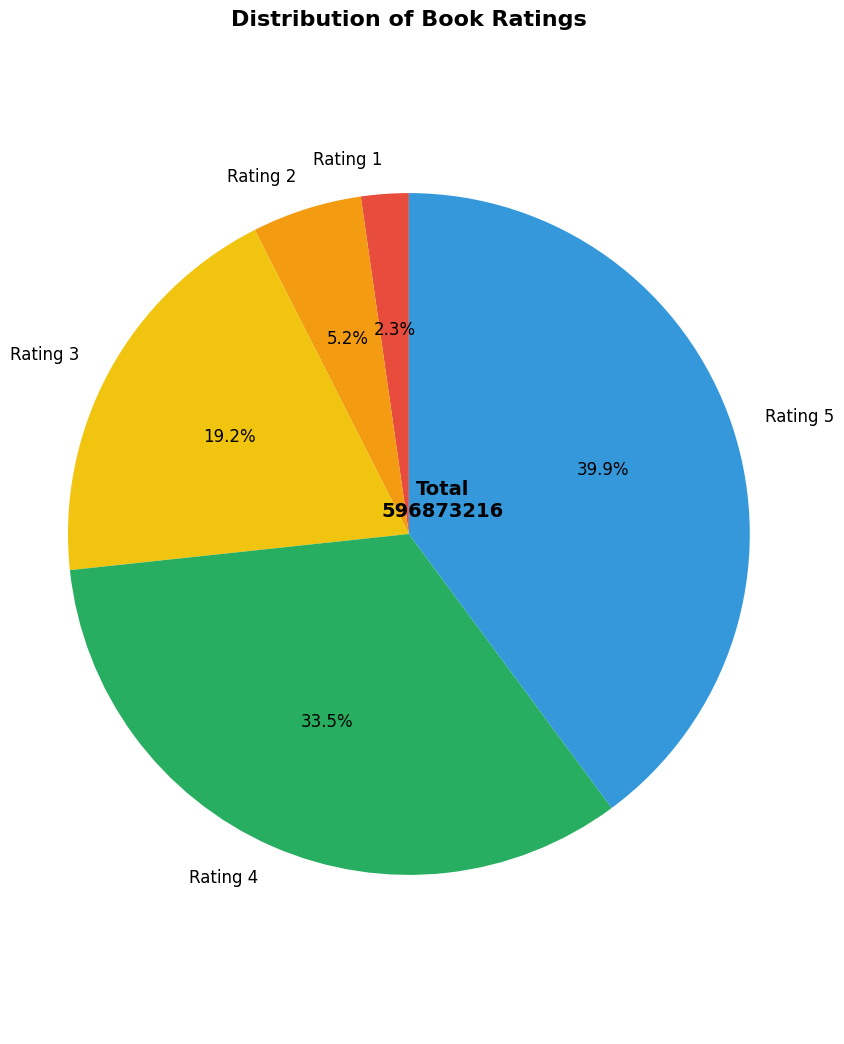

In [12]:
import matplotlib.pyplot as plt

# Rename the column labels
rating_counts = books_df.rename(columns={'ratings_1': 'Rating 1', 'ratings_2': 'Rating 2',
                                         'ratings_3': 'Rating 3', 'ratings_4': 'Rating 4',
                                         'ratings_5': 'Rating 5'})

# Count the number of books for each rating
rating_sum = rating_counts[['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']].sum()

# Define custom colors for each rating category
colors = ['#E74C3C', '#F39C12', '#F1C40F', '#27AE60', '#3498DB']

# Create pie chart with smaller size
plt.figure(figsize=(15, 10))

# Plot the pie chart
plt.pie(rating_sum, labels=rating_sum.index, autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'color': 'black', 'fontsize': 12})

# Set equal aspect ratio to ensure circular shape
plt.axis('equal')

# Add a title to the chart
plt.title('Distribution of Book Ratings', fontsize=16, fontweight='bold')

# Move the percentage labels inside the pie slices
plt.gca().set_position([0, 0, 0.5, 1])  # Adjust the position of the pie chart
plt.gca().text(0.1, 0.1, 'Total\n' + str(rating_sum.sum()), ha='center', va='center', fontsize=14, fontweight='bold')

plt.show()

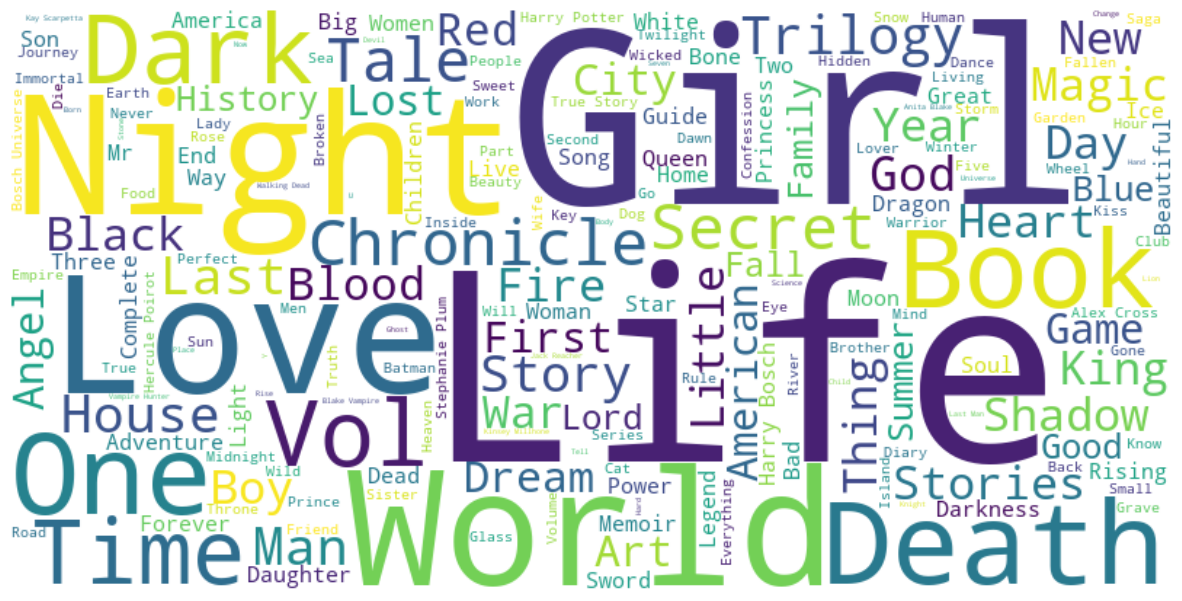

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all book titles into a single string
book_titles = ' '.join(books_df['title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(book_titles)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Collaborative Recommendation System using KNN

The collaborative recommendation system is a type of filtering system that suggests items or content to users based on their past behaviors and preferences, as well as the behaviors and preferences of other similar users.This system relies on the assumption that users with similar tastes and preferences in the past will have similar tastes and preferences in the future.
As of k-nearest neighbor (KNN) based recommender system is a type of collaborative filtering system that uses the ratings given by users to other items to make recommendations. The system works by calculating the similarity between each pair of items, and then using the similarities to predict how a user will rate a given item.
(Ref. https://www.aurigait.com/blog/recommendation-system-using-knn/, https://www.itm-conferences.org/articles/itmconf/abs/2017/04/itmconf_ita2017_04008/itmconf_ita2017_04008.html)

# What I have done here
In the above part i have used KNN algorithm to perform a collaborative recommended system and i have used RMSE and MAE to measure the performance of the algorithm. The core functionality is encapsulated within a function called "get_recomm". This function accepts a book title, the number of neighbors to consider, and a display flag as parameters.It retrieves the index of the queried book in the ratings_df pivot table, using a hypothetical get_book_id function. The KNN model is then queried to obtain the distances and indices of the nearest neighbors for the queried book.By iterating through the distances and indices of the nearest neighbors, the function retrieves the recommended book IDs. If the display flag is set to True, it prints the recommendations, including the book ID and the corresponding distance.

In [14]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [16]:
books = books_df.copy()
ratings = ratings_df.copy()

To clean and preprocess the data by removing missing values and duplicate entries, ensuring the data frames are ready for further analysis or modeling tasks.

In [17]:
books = books.dropna()
ratings = ratings.sort_values("user_id")
ratings.drop_duplicates(subset=["user_id","book_id"], keep='first', inplace=True) 
books.drop_duplicates(subset='original_title', keep='first', inplace=True)

To prepares a new data frame "df" that contains relevant information for further analysis.

In [6]:
merged_df = pd.merge(books, ratings, how='left', left_on=['id'], right_on=['book_id'])
df = merged_df[['id','original_title', 'user_id', 'rating']]

df = df.rename(columns = {'id':'book_id'})
df.head(2)

,book_id,original_title,user_id,rating
0,1,The Hunger Games,314,5
1,1,The Hunger Games,439,3


 To create the pivot table and filling missing values with zeros, the code organizes the data in a matrix-like format, where the rows represent books, the columns represent users, and the values represent ratings.

In [7]:
ratings_df = df.pivot_table(index='book_id',columns='user_id',values='rating').fillna(0)

pd.set_option('display.max_columns', 100)
ratings_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,53375,53376,53377,53378,53379,53380,53381,53382,53383,53384,53385,53386,53387,53388,53389,53390,53391,53392,53393,53394,53395,53396,53397,53398,53399,53400,53401,53402,53403,53404,53405,53406,53407,53408,53409,53410,53411,53412,53413,53414,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
ratings_df.shape

(7755, 50681)

In [9]:
ratings_matrix = csr_matrix(ratings_df.values)

In [10]:
model_knn = NearestNeighbors(metric='cosine', algorithm = 'brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### Helper Function

In [11]:
def get_book_id(book_title):
    target_df = df.loc[df['original_title'] == book_title]
    return target_df['book_id'].iloc[0]

id_TheHungerGames = get_book_id('The Hunger Games')
print(id_TheHungerGames)

1


In [12]:
def get_title(book_id):
    target_df = df.loc[df['book_id'] == book_id]
    return target_df['original_title'].iloc[0]

print(get_title(1))

The Hunger Games


In [19]:
def get_recomm(book_title, num_neighbors=10, display=False): 
    book_ids = []
    
    query_index = get_book_id(book_title) - 1
    
    if num_neighbors > 0:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = num_neighbors + 1)
    else:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10 + 1)
    
    for i in range(0, len(distances.flatten())):
        if display is True:
            if i == 0:
                print('Recommendations for ', book_title, '\n')
            else:    
                print('{0}\t Book ID: {1}\t  Distance: {2}:\n'.format(i, ratings_df.index[indices.flatten()[i]], distances.flatten()[i]))
        
        book_ids.append(ratings_df.index[indices.flatten()[i]])
    
    return book_ids

#### Test the result

In [20]:
recommendations_for_TheHungerGames = get_recomm('The Hunger Games', num_neighbors=10, display=True)

Recommendations for  The Hunger Games 

1	 Book ID: 17	  Distance: 0.4053256862294832:

2	 Book ID: 31	  Distance: 0.42674642418525066:

3	 Book ID: 2	  Distance: 0.4444738573252147:

4	 Book ID: 20	  Distance: 0.4523031603835689:

5	 Book ID: 3	  Distance: 0.49084774300774026:

6	 Book ID: 93	  Distance: 0.5119913445564398:

7	 Book ID: 5	  Distance: 0.5197672572777041:

8	 Book ID: 16	  Distance: 0.5229117539369219:

9	 Book ID: 9	  Distance: 0.5271915645842881:

10	 Book ID: 37	  Distance: 0.5278079122055651:



In [21]:
# Top 10 recommendations for Harry Potter and the Philosopher's Stone

book_ids_for_H = get_recomm('Harry Potter and the Philosopher\'s Stone', num_neighbors=10)
# skip the first item
for b in book_ids_for_H[1:]:
    print(get_title(b))

To Kill a Mockingbird
Memoirs of a Geisha
Nineteen Eighty-Four
The Great Gatsby
 The Fellowship of the Ring
Lord of the Flies 
Harry Potter and the Prisoner of Azkaban
The Hobbit or There and Back Again
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944
Jane Eyre


In [22]:
# Top 15 recommendations for Twilight
book_ids_for_H = get_recomm('Twilight', num_neighbors=15)
for b in book_ids_for_H[1:]:
    print(get_title(b))

Harry Potter and the Philosopher's Stone
Pride and Prejudice
The Hunger Games
Memoirs of a Geisha
The Kite Runner 
The Catcher in the Rye
The Book Thief
O Alquimista
The Giver
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944
 The Fellowship of the Ring
Män som hatar kvinnor
The Lovely Bones
Jane Eyre
Fahrenheit 451


### K-fold cross-validation to evaluate the performance of a recommendation system
The results of the evaluation show the RMSE and MAE values for each fold, indicating the accuracy of the predicted ratings compared to the actual ratings. These metrics provide valuable insights into the model's performance across different subsets of the dataset. By employing K-fold cross-validation, the evaluation accounts for both training and validation sets, ensuring a robust assessment of the model's predictive capabilities. This approach helps in determining the model's effectiveness in predicting ratings and allows for comparisons between different models or parameter settings.

(Ref. https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/)

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

def calculate_fold(data, k):
    fold_indices = []
    kf = KFold(n_splits=k, shuffle=True)

    for train_index, val_index in kf.split(data):
        fold_indices.append((train_index, val_index))

    return fold_indices

def calculate_metrics(actual_ratings, predicted_ratings):
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    return rmse, mae

# Example usage
actual_ratings = [4, 3, 5, 2, 4]
predicted_ratings = [3.8, 2.5, 4.3, 1.8, 4.1]
k = 5

fold_indices = calculate_fold(actual_ratings, k)

for fold, (train_index, val_index) in enumerate(fold_indices):
    print("Fold", fold + 1)
    print("Training indices:", train_index)
    print("Validation indices:", val_index)

    train_actual = [actual_ratings[i] for i in train_index]
    train_predicted = [predicted_ratings[i] for i in train_index]
    val_actual = [actual_ratings[i] for i in val_index]
    val_predicted = [predicted_ratings[i] for i in val_index]

    rmse, mae = calculate_metrics(val_actual, val_predicted)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print()


Fold 1
Training indices: [0 1 2 3]
Validation indices: [4]
RMSE: 0.09999999999999964
MAE: 0.09999999999999964

Fold 2
Training indices: [0 1 2 4]
Validation indices: [3]
RMSE: 0.19999999999999996
MAE: 0.19999999999999996

Fold 3
Training indices: [0 2 3 4]
Validation indices: [1]
RMSE: 0.5
MAE: 0.5

Fold 4
Training indices: [0 1 3 4]
Validation indices: [2]
RMSE: 0.7000000000000002
MAE: 0.7000000000000002

Fold 5
Training indices: [1 2 3 4]
Validation indices: [0]
RMSE: 0.20000000000000018
MAE: 0.20000000000000018



### Testing and Training data visulization 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')

# Merge the datasets on book_id
merged_df = pd.merge(books, ratings, on='book_id')

# Select relevant columns
df = merged_df[['book_id', 'original_title', 'user_id', 'rating']]

# Split into features (X) and target (y)
X = df[['book_id', 'user_id']]
y = df['rating']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Testing features
# y_train: Training target
# y_test: Testing target



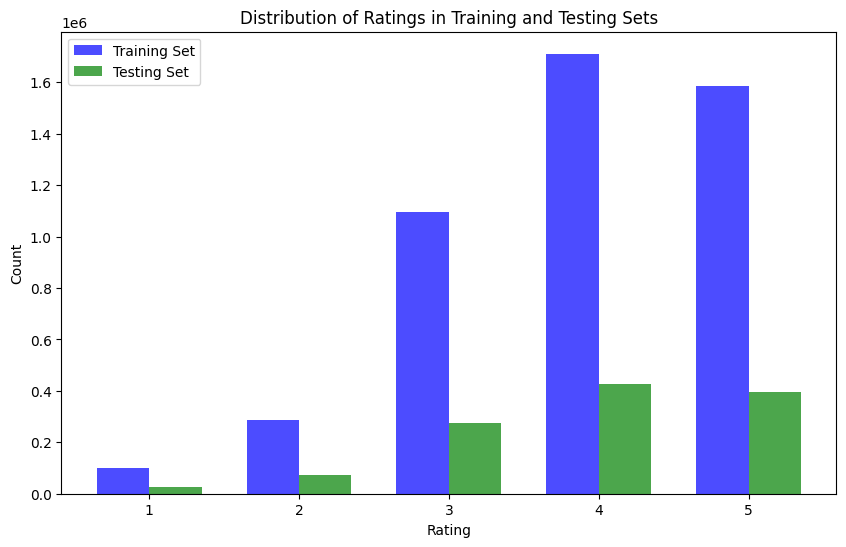

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each rating in the training set
train_rating_counts = y_train.value_counts().sort_index()

# Count the occurrences of each rating in the testing set
test_rating_counts = y_test.value_counts().sort_index()

# Get the unique rating values
rating_values = sorted(set(train_rating_counts.index).union(test_rating_counts.index))

# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for the bars
train_pos = np.arange(len(rating_values))
test_pos = train_pos + bar_width

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training set ratings
ax.bar(train_pos, train_rating_counts.values, bar_width, color='blue', alpha=0.7, label='Training Set')

# Plot the testing set ratings
ax.bar(test_pos, test_rating_counts.values, bar_width, color='green', alpha=0.7, label='Testing Set')

# Set the x-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Set the title
ax.set_title('Distribution of Ratings in Training and Testing Sets')

# Move the legend to the upper right
ax.legend(loc='upper left')

# Set the tick positions and labels on the x-axis
ax.set_xticks(train_pos + bar_width / 2)
ax.set_xticklabels(rating_values)

# Show the plot
plt.show()



# Using Matrix Factorization
Matrix factorization is a technique that is commonly used in recommendation systems to predict the ratings that users will give to items. These matrices can then be used to make predictions about how a user will rate an item by taking the dot product of the user and item vectors.
In my work i will use Non-Negative Matrix Factorization (NMF) and Singular Value Decomposition(SVD)

In [22]:
# an example of the correaltion between the books '1776' and 'The Fellowship of the Ring'
book1776=bookratings['1776']
bookratings[[" The Fellowship of the Ring","1776"]].corr()

original_title,The Fellowship of the Ring,1776
original_title,,
The Fellowship of the Ring,1.000000,0.180986
1776,0.180986,1.000000


In [23]:
# show books with most correlation
bookratings.corrwith(book1776).sort_values(ascending=False).to_frame('corr')

,corr
original_title,
Down the Rabbit Hole: Curious Adventures and Cautionary Tales of a Former Playboy Bunny,1.0
A Year in the Merde,1.0
"Narcissus in Chains (Anita Blake, Vampire Hunter, #10)",1.0
For a Few Demons More,1.0
Kraken: An Anatomy,1.0
...,...
高校デビュー 1,NaN
黒執事 I [Kuroshitsuji I],NaN
黒執事 II [Kuroshitsuji II],NaN


In [24]:
# show books with least correlation
bookratings.corrwith(book1776).sort_values(ascending=True).to_frame('corr').dropna()

,corr
original_title,
The Flamethrowers,-1.0
The Missing Piece,-1.0
The False Prince,-1.0
I Let You Go,-1.0
This Is Where It Ends,-1.0
...,...
Every Thing On It,1.0
Everlost,1.0
The Year of Fog,1.0


In [25]:
# show a sample of random 15 books and see their correlation
bookratings.corrwith(book1776).to_frame('corr').dropna().sample(15)

,corr
original_title,
"Star Wars: The Jedi Academy Trilogy, Volume III - Champions of the Force",-0.686406
Prayers for Rain,0.529740
The Shunning,0.981981
Cold Days,-0.321035
The Last Patriot,0.442981
Needful Things,0.086852
The Big Short: Inside the Doomsday Machine,0.310762
Exodus,0.220930
The Private Patient,0.919145


# What i have done here
## Non-Negative Matrix Factorization (NMF)
Non-Negative Matrix Factorization (NMF) to perform matrix factorization and generate personalized book recommendations for users.NMF is applied to factorize the ratings matrix into user and item features, revealing latent preferences. The recommend_books function takes a user ID and provides top book recommendations based on predicted ratings. By calculating the dot product between user and item features, the code generates personalized recommendations. The example usage showcases recommendations for user ID 1. NMF. This approach allows for the discovery of latent user preferences and provides users with tailored suggestions, enhancing their book discovery and reading experience.

In [27]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF

# Perform matrix factorization using Non-Negative Matrix Factorization (NMF)
model = NMF(n_components=10, random_state=42)
user_features = model.fit_transform(ratings_matrix)
item_features = model.components_

# Define a function to recommend books for a given user
def recommend_books(user_id, num_recommendations=5):
    user_index = pivot_df.index.get_loc(user_id)
    user_ratings = ratings_matrix[user_index, :]

    # Calculate the predicted ratings
    predicted_ratings = np.dot(user_features[user_index, :], item_features)

    # Get the indices of the top recommended books
    top_books_indices = np.argsort(predicted_ratings)[::-1][:num_recommendations]

    # Get the corresponding book IDs
    top_books_ids = pivot_df.columns[top_books_indices]

    # Get the book information from the books dataset
    recommended_books = books_df[books_df['book_id'].isin(top_books_ids)][['book_id', 'original_title']]

    return recommended_books

# Example usage
user_id = 1
recommended_books = recommend_books(user_id)
print(f"Recommended books for user {user_id}:")
print(recommended_books)

Recommended books for user 1:
    book_id         original_title
3         4  To Kill a Mockingbird
10       11       The Kite Runner 
29       30              Gone Girl
30       31               The Help
45       46    Water for Elephants


In [5]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the ratings data into a DataFrame (example)
ratings_data = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3],
    'book_id': [1, 2, 1, 3, 2, 3],
    'rating': [5, 4, 3, 2, 1, 5]
})

# Create a pivot table of ratings
pivot_df = ratings_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)
ratings_matrix = csr_matrix(pivot_df.values)

# Perform matrix factorization using Non-Negative Matrix Factorization (NMF)
model = NMF(n_components=10, random_state=42)
user_features = model.fit_transform(ratings_matrix)
item_features = model.components_

# Define a function to recommend books for a given user
def recommend_books(user_id, num_recommendations=5):
    user_index = pivot_df.index.get_loc(user_id)
    user_ratings = ratings_matrix[user_index, :]

    # Calculate the predicted ratings
    predicted_ratings = np.dot(user_features[user_index, :], item_features)

    # Get the indices of the top recommended books
    top_books_indices = np.argsort(predicted_ratings)[::-1][:num_recommendations]

    # Get the corresponding book IDs
    top_books_ids = pivot_df.columns[top_books_indices]

    return top_books_ids

# Example usage
user_id = 1
recommended_books = recommend_books(user_id)

# Get the actual ratings for the user
user_index = pivot_df.index.get_loc(user_id)
actual_ratings = ratings_matrix[user_index, :].toarray().flatten()

# Calculate the predicted ratings
predicted_ratings = np.dot(user_features[user_index, :], item_features)

# Remove any NaN values in the actual and predicted ratings
actual_ratings = actual_ratings[~np.isnan(actual_ratings).astype(bool)]
predicted_ratings = predicted_ratings[~np.isnan(predicted_ratings).astype(bool)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

# Calculate MAE
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print(f"Recommended books for user {user_id}:")
print(recommended_books)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")




Recommended books for user 1:
Index([1, 2, 3], dtype='int64', name='book_id')
RMSE: 2.736696481783716e-05
MAE: 1.580032450477736e-05


## Using Singular Value Decomposition(SVD)
The provided code implements TruncatedSVD for collaborative book recommendations. It splits the data into training and testing sets, creates a user-item matrix, and applies matrix factorization to uncover latent features. The code then demonstrates how to generate personalized recommendations for a specific user based on the predicted ratings. The recommendations are sorted and displayed. TruncatedSVD enables the system to capture underlying patterns and user preferences, providing tailored book suggestions. This approach enhances the recommendation system's ability to deliver personalized recommendations, improving the user experience and promoting book discovery.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

In [32]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [38]:
# Define the path to your ratings.csv file
ratings_file_path = 'ratings.csv'

# Define the path to your books.csv file
books_file_path = 'books.csv'

# Load the ratings dataset
ratings_df = pd.read_csv(ratings_file_path)

# Split the data into training and test sets
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create the user-item matrix
pivot_df = train_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)

# Apply truncated SVD to factorize the user-item matrix
svd = TruncatedSVD(n_components=10, random_state=42)
user_features = svd.fit_transform(pivot_df.values)
item_features = svd.components_

# Example usage: Recommend books for a specific user
user_id = 1

# Get the index of the user in the user-item matrix
user_index = pivot_df.index.get_loc(user_id)

# Calculate predicted ratings for the user
predicted_ratings = np.dot(user_features[user_index, :], item_features)

# Sort the predicted ratings in descending order
top_books_indices = np.argsort(predicted_ratings)[::-1]

# Get the corresponding book IDs
top_books_ids = pivot_df.columns[top_books_indices]

# Print the top recommended books
num_recommendations = 5
top_recommendations = top_books_ids[:num_recommendations]

print(f"Top {num_recommendations} recommended books for user {user_id}:")
for book_id in top_recommendations:
    print(f"Book ID: {book_id}")


Top 5 recommended books for user 1:
Book ID: 11
Book ID: 31
Book ID: 4
Book ID: 33
Book ID: 16


# What i could not done 
I have tried to use the surprise library for more accurate result and do some deep analyzation which i could not make becasue of some system error. Moreover, i have used k-fold validation to check the performance of my algorithm becasue i was not able to impliment Tune hyperparameter. Moreover, i did not performe qualitively evalution of the performance for few selected user as well as comparison of the two approach. 